# 10.3 교차엔트로피와 쿨백-라이블러 발산

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

# 컴퓨터에 이미 깔린 한글 폰트 적용하면 됨.
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 설치된 폰트 중 한글 지원하는 폰트 찾기 : Nanum이나 Gothic 등 검색
# import matplotlib.font_manager as fm
# font_list = [font.name for font in fm.fontManager.ttflist]
# for f in font_list:
#     if 'Gothic' in f:
#         print(f)

### 예제 10.3.1

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["y"] = iris.target[idx]
df["y_hat"] = (df["sepal length (cm)"] > 5.4).astype(int)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,y_hat
95,5.7,3.0,4.2,1.2,1,1
96,5.7,2.9,4.2,1.3,1,1
97,6.2,2.9,4.3,1.3,1,1
98,5.1,2.5,3.0,1.1,1,0
99,5.7,2.8,4.1,1.3,1,1


In [4]:
from sklearn.metrics import log_loss

log_loss(df["y"], df["y_hat"])

3.799305383311686

#### (1) 붓꽃 데이터에서 꽃받침의 길이(sepal length)의 최솟값과 최댓값 구간을 0.5 간격으로 나누어 각각의 값을 기준값으로 하였을 때 로그손실이 어떻게 변하는지 그래프로 그려라. 종으로는 세토사와 베르시칼라만 사용한다.

C:\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

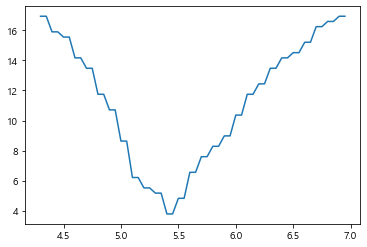

In [14]:
def calculate_logloss(df, thres):
    df["y_hat"] = (df["sepal length (cm)"] > thres).astype(int)
    return log_loss(df["y"], df["y_hat"])
min = df['sepal length (cm)'].min()
max = df['sepal length (cm)'].max()

grid = np.array(range(int(min*20), int(max*20)))/20

logloss = []
for thres in grid:
    logloss.append(calculate_logloss(df, thres))
    
sns.lineplot(grid, logloss)

#### (2) 꽃받침의 길이를 특징으로 사용하였을 때 어떤 값을 기준값으로 하는 것이 가장 좋은가?

In [21]:
grid[logloss.index(np.min(logloss))]

5.4

#### (3) 꽃받침의 폭(sepal width)에 대해 위의 분석을 실시하라. 이 때는 기준값이 어떻게 되는가?

C:\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

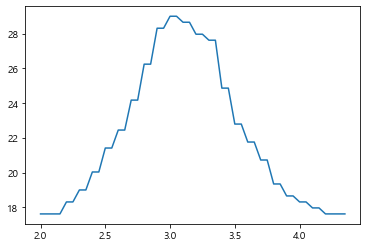

In [26]:
def calculate_logloss_width(df, thres):
    df["y_hat_width"] = (df["sepal width (cm)"] < thres).astype(int)
    return log_loss(df["y"], df["y_hat_width"])
min_width = df['sepal width (cm)'].min()
max_width = df['sepal width (cm)'].max()

grid_width = np.array(range(int(min_width*20), int(max_width*20)))/20

logloss_width = []
for thres in grid_width:
    logloss_width.append(calculate_logloss_width(df, thres))
    
sns.lineplot(grid_width, logloss_width)

In [24]:
grid_width[logloss_width.index(np.min(logloss_width))]

4.2

#### (4) 꽃받침의 길이(sepal length)와 꽃받침의 폭(sepal width) 중 하나를 특징으로 선택해야 한다면 어떤 것을 선택해야 하는가?

In [25]:
np.min(logloss), np.min(logloss_width)

(3.799305383311686, 17.614783957378748)